In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
DATA_PATH = '../data/combined_tripdata.csv'
df = pd.read_csv(DATA_PATH)
print(df.head())

C:\Users\Doug\AppData\Local\Temp\ipykernel_34828\1015349317.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


            ride_id rideable_type           started_at             ended_at  \
0  A847FADBBC638E45   docked_bike  2020-04-26 17:45:14  2020-04-26 18:12:03   
1  5405B80E996FF60D   docked_bike  2020-04-17 17:08:54  2020-04-17 17:17:03   
2  5DD24A79A4E006F4   docked_bike  2020-04-01 17:54:13  2020-04-01 18:08:36   
3  2A59BBDF5CDBA725   docked_bike  2020-04-07 12:50:19  2020-04-07 13:02:31   
4  27AD306C119C6158   docked_bike  2020-04-18 10:22:59  2020-04-18 11:15:54   

             start_station_name start_station_id             end_station_name  \
0                  Eckhart Park             86.0  Lincoln Ave & Diversey Pkwy   
1     Drake Ave & Fullerton Ave            503.0              Kosciuszko Park   
2          McClurg Ct & Erie St            142.0   Indiana Ave & Roosevelt Rd   
3  California Ave & Division St            216.0       Wood St & Augusta Blvd   
4          Rush St & Hubbard St            125.0   Sheridan Rd & Lawrence Ave   

  end_station_id  start_lat  start_lng

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25256682 entries, 0 to 25256681
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 2.4+ GB
None


In [4]:
df['column_name'] = df['column_name'].astype(int)
print(df.describe(include='all'))

                 ride_id rideable_type           started_at  \
count           25256682      25256682             25256682   
unique          25256262             4             22012617   
top     AF894E23F6CF2F47  classic_bike  2020-07-12 13:16:59   
freq                   2      11048363                   12   
mean                 NaN           NaN                  NaN   
std                  NaN           NaN                  NaN   
min                  NaN           NaN                  NaN   
25%                  NaN           NaN                  NaN   
50%                  NaN           NaN                  NaN   
75%                  NaN           NaN                  NaN   
max                  NaN           NaN                  NaN   

                   ended_at       start_station_name start_station_id  \
count              25256682                 21792266         21791511   
unique             22020331                     2295             3073   
top     2022-08-22 12:47

In [5]:
print("--- Missing values ---")
print(df.isnull().sum())

--- Missing values ---
ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    3464416
start_station_id      3465171
end_station_name      3665462
end_station_id        3666064
start_lat                   0
start_lng                   0
end_lat                 28393
end_lng                 28393
member_casual               0
dtype: int64


In [9]:
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

df['start_hour'] = df['started_at'].dt.hour
df['start_day_of_week'] = df['started_at'].dt.day_name()
df['start_month'] = df['started_at'].dt.month_name()
df['start_year'] = df['started_at'].dt.year

df['end_hour'] = df['ended_at'].dt.hour
df['end_day_of_week'] = df['ended_at'].dt.day_name()
df['end_month'] = df['ended_at'].dt.month_name()
df['end_year'] = df['ended_at'].dt.year

df['ride_duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

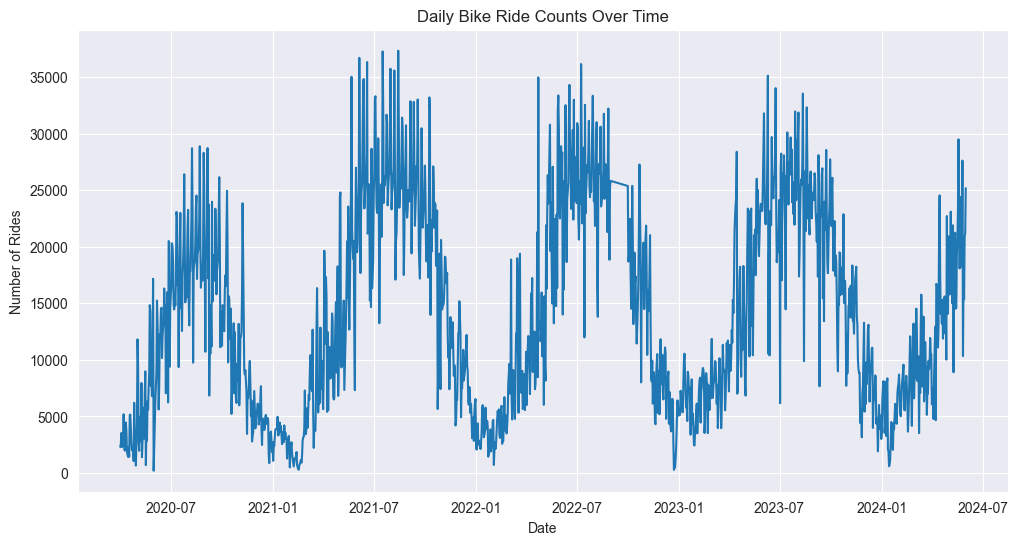

In [10]:
# Ride Counts Over Time (Daily)
plt.figure(figsize=(12, 6))
daily_rides = df['started_at'].dt.date.value_counts().sort_index()
daily_rides.plot(kind='line')
plt.title('Daily Bike Ride Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

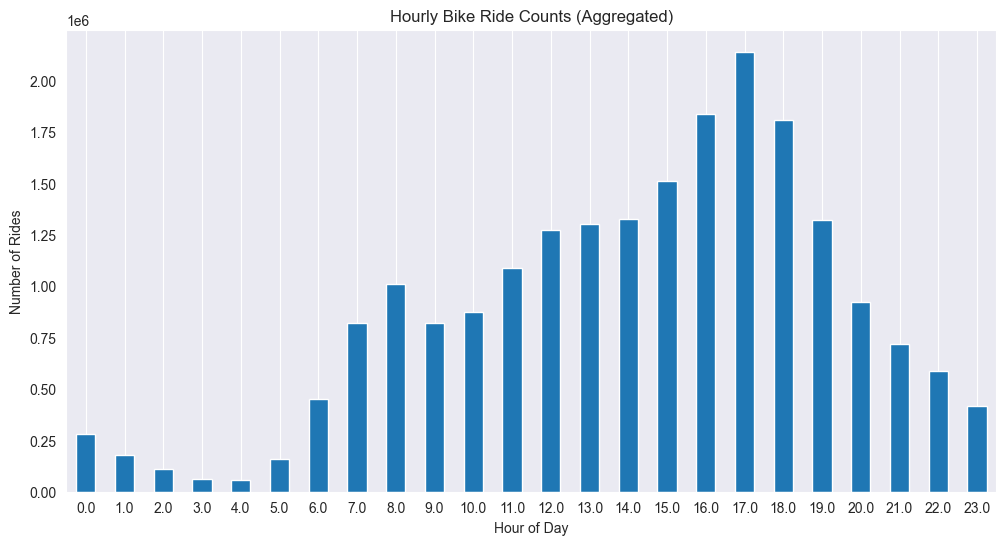

In [11]:
# Ride Counts Over Time (Hourly)
plt.figure(figsize=(12, 6))
hourly_rides = df['start_hour'].value_counts().sort_index()
hourly_rides.plot(kind='bar')
plt.title('Hourly Bike Ride Counts (Aggregated)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

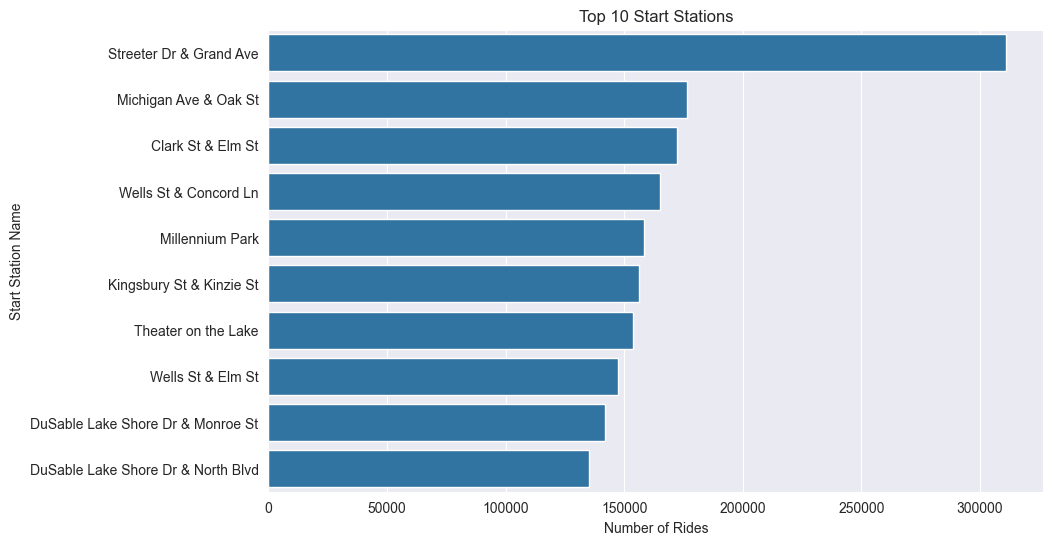

In [17]:
# Top Start Stations
plt.figure(figsize=(10, 6))
top_start_stations = df['start_station_name'].value_counts().nlargest(10)
sns.barplot(x=top_start_stations.values, y=top_start_stations.index)
plt.title('Top 10 Start Stations')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station Name')
plt.show()

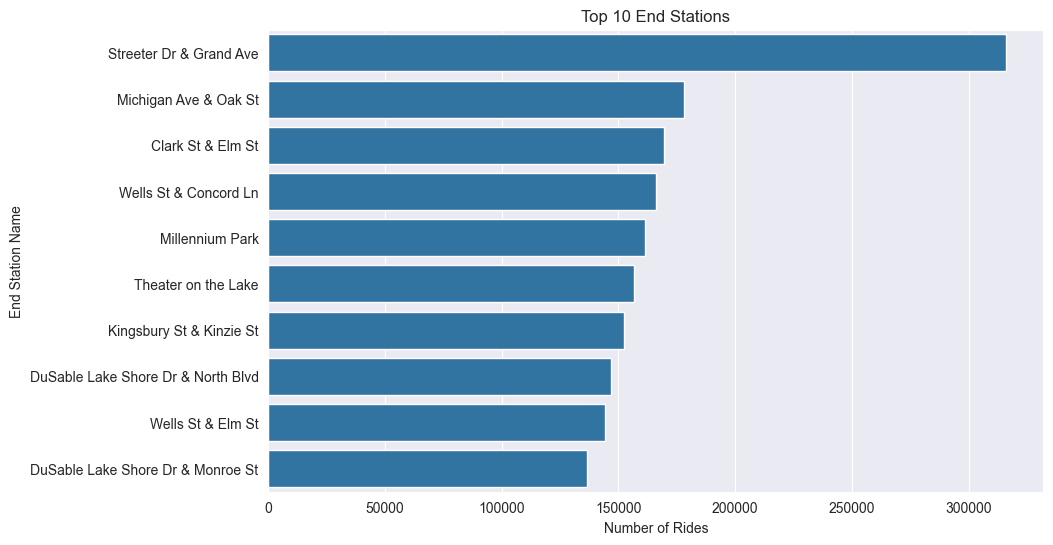

In [18]:
# Top End Stations
plt.figure(figsize=(10, 6))
top_end_stations = df['end_station_name'].value_counts().nlargest(10)
sns.barplot(x=top_end_stations.values, y=top_end_stations.index)
plt.title('Top 10 End Stations')
plt.xlabel('Number of Rides')
plt.ylabel('End Station Name')
plt.show()

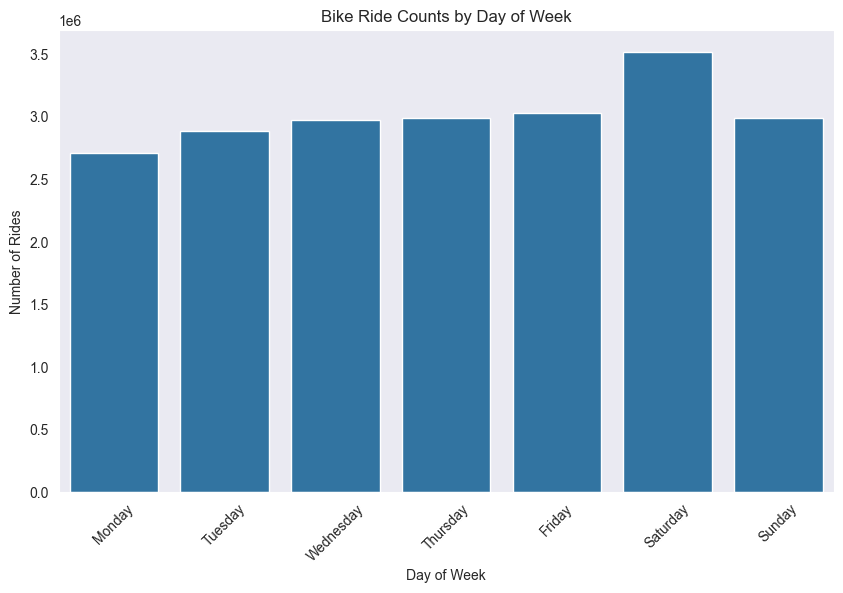

In [19]:
# Ride Counts by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
day_rides = df['start_day_of_week'].value_counts().reindex(day_order)
sns.barplot(x=day_rides.index, y=day_rides.values)
plt.title('Bike Ride Counts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

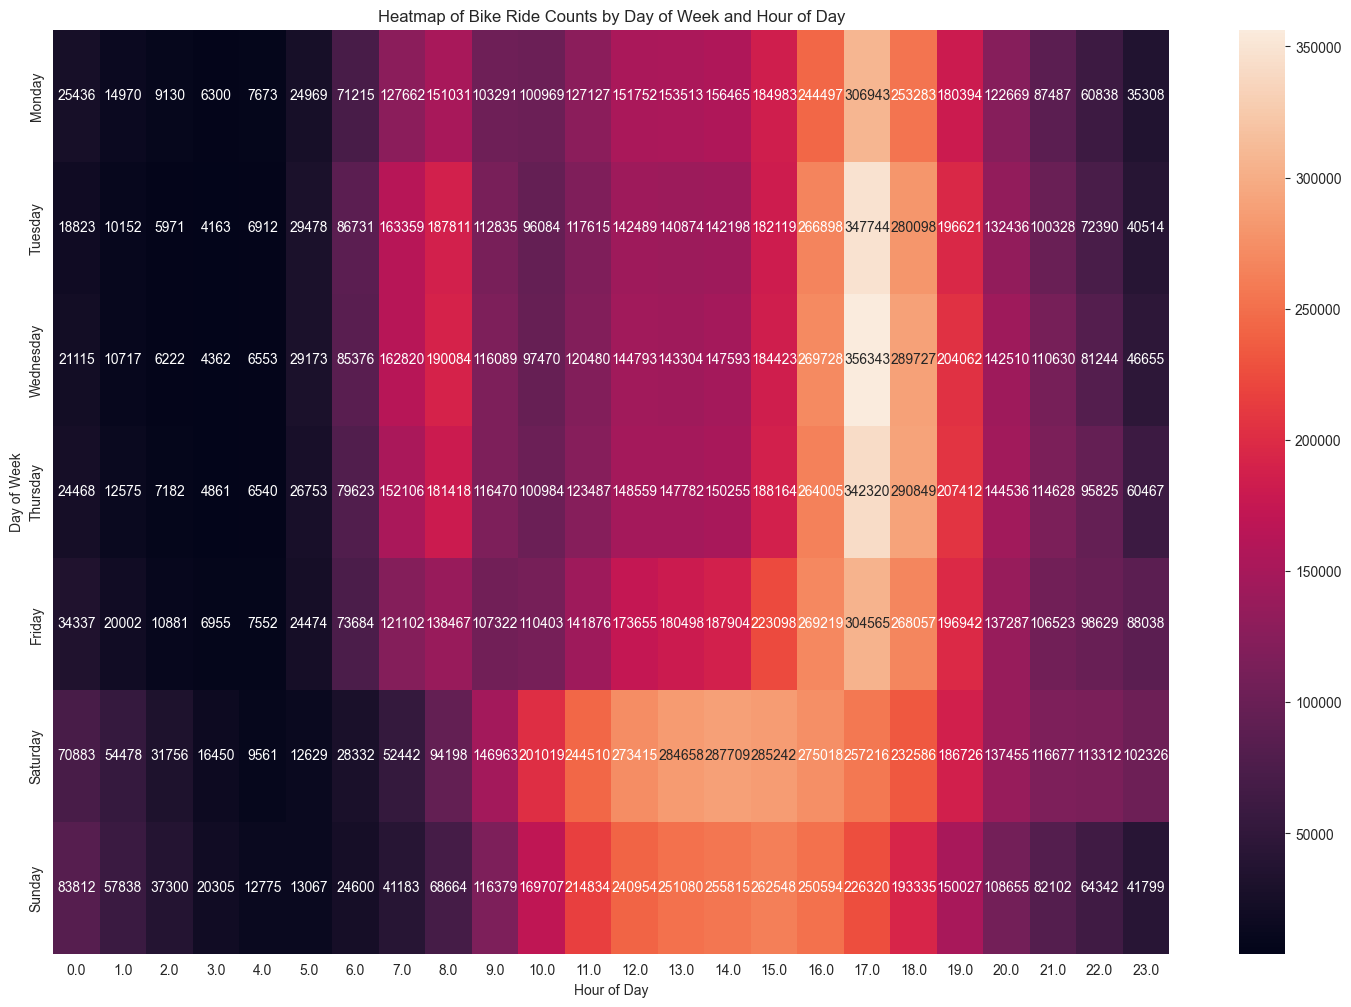

In [22]:
# Heatmap of Ride Counts by Day of Week and Hour of Day
day_hour_rides = df.groupby(['start_day_of_week', 'start_hour']).size().unstack()
day_hour_rides = day_hour_rides.reindex(day_order)

plt.figure(figsize=(18, 12))
sns.heatmap(day_hour_rides, annot=True, fmt="d")
plt.title('Heatmap of Bike Ride Counts by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

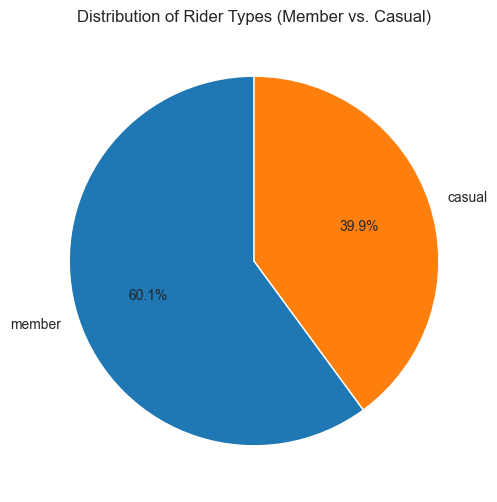

In [23]:
# Distribution of Rider Types
plt.figure(figsize=(6, 6))
rider_type_counts = df['member_casual'].value_counts()
plt.pie(rider_type_counts, labels=rider_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Rider Types (Member vs. Casual)')
plt.show()

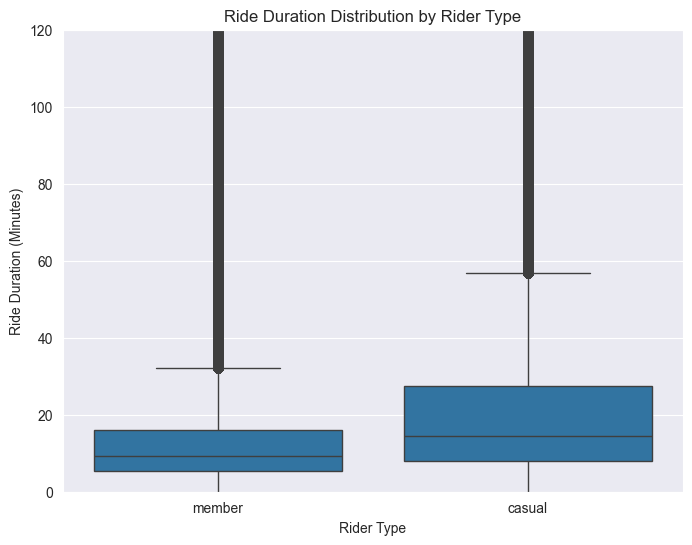

In [25]:
# Ride Duration by Rider Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_casual', y='ride_duration_minutes', data=df)
plt.title('Ride Duration Distribution by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Ride Duration (Minutes)')
plt.ylim(0, 120)
plt.show()